**#Scenario 2**

In [63]:
df=pd.read_csv("/kaggle/input/lic-stock-price-data/LICI - 10 minute data.csv")

In [64]:
df.head()

,date,open,high,low,close,volume
0,2022-05-17 09:35:00+05:30,872.00,872.00,872.0,872.00,3759243
1,2022-05-17 09:45:00+05:30,872.00,872.00,872.0,872.00,0
2,2022-05-17 09:55:00+05:30,872.00,918.10,862.0,902.80,12449251
3,2022-05-17 10:05:00+05:30,902.45,908.95,896.0,902.15,5237329
4,2022-05-17 10:15:00+05:30,902.30,905.00,900.0,903.85,1820317


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3684 entries, 0 to 3683
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    3684 non-null   object 
 1   open    3684 non-null   float64
 2   high    3684 non-null   float64
 3   low     3684 non-null   float64
 4   close   3684 non-null   float64
 5   volume  3684 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 172.8+ KB


In [68]:
df.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [69]:
df['Target'] = (df['close'].shift(-1) > df['close']).astype(int)
df_model = df.drop(['date'], axis=1).dropna()

X = df_model.drop('Target', axis=1)
y = df_model['Target']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [76]:
# Train Logistic Regression
model = LogisticRegression(C=100, penalty='l2', solver='liblinear', max_iter=5000)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Metrics
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred):.4f}")

Accuracy:  0.5889
Precision: 0.8667
Recall:    0.0414
F1-Score:  0.0790


Text(0.5, 1.0, 'Confusion Matrix')

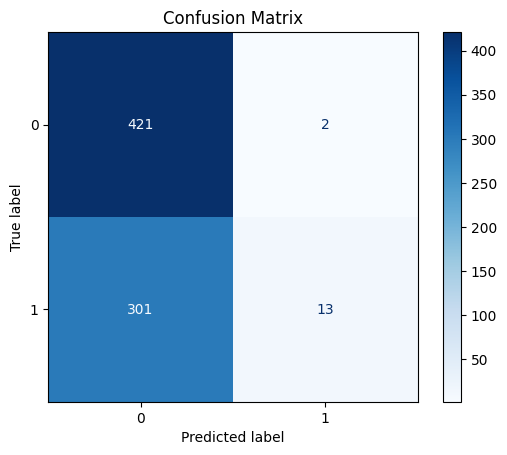

In [77]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")

Text(0.5, 1.0, 'Receiver Operating Characteristic')

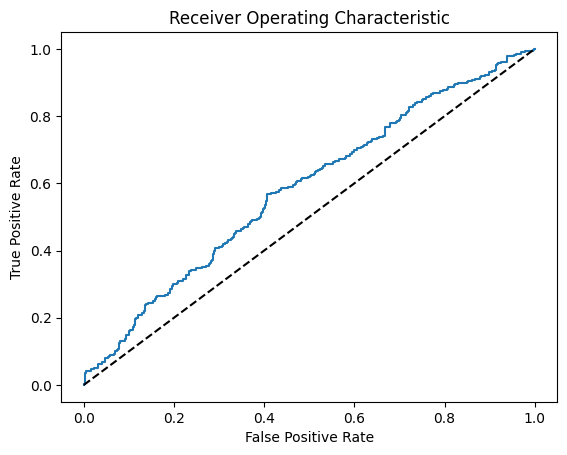

In [78]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')

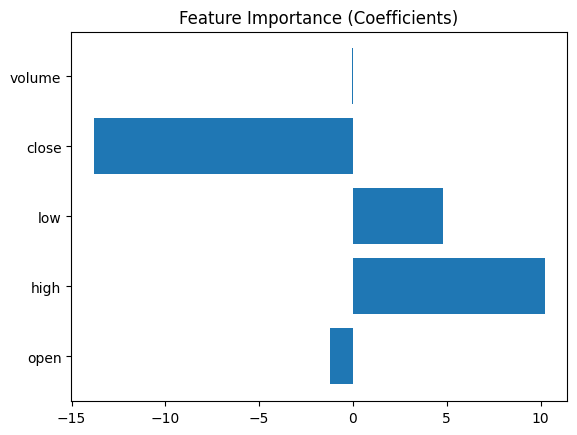

In [79]:
importance = model.coef_[0]
features = X.columns
plt.barh(features, importance)
plt.title("Feature Importance (Coefficients)")
plt.show()

In [81]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'] 
}

grid_search = GridSearchCV(LogisticRegression(max_iter=5000), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
